In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering-analysis-on-wine-dataset/wine-clustering.csv


In [2]:
df = pd.read_csv('/kaggle/input/clustering-analysis-on-wine-dataset/wine-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


In [5]:
pip install mvlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 26.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.3.4-cp310-cp310-linux_x86_64.whl size=8467830 sha256=43467c47f5e1b286086857523ec3bde68105dac9329a2476ea13551408216d02
  Stored in directory: /root/.cache/pip/wheels/38/c6/49/eaba6d234887d98d9c85185e2a90bd7bb77934e85eefaf317e
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.4
    Uninstalling matplotlib-3.7.4:
      Successfully uninstalled matplotlib-3.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cartopy 0.22.0 requires matplotlib>=3.4, but you have matplotlib 3.3.4 which is incompatible.
beatrix-jupyterlab 2023.814.15003

In [6]:
# Assuming df_normalized is your DataFrame
import numpy as np
from mvlearn.cluster import MultiviewKMeans

# Duplicate the single view to create a multiview dataset
Xs = [df_normalized.values, df_normalized.values]

# Set the number of clusters
n_clusters = 3  # You can adjust this based on your specific requirements

# Create a MultiviewKMeans instance and fit the model to the data
m_kmeans = MultiviewKMeans(n_clusters=n_clusters, random_state=42)
m_clusters = m_kmeans.fit_predict(Xs)

# Display the clustering results (you can adjust this based on your preferences)
# For example, you can print the cluster assignments for each view
for i, view_clusters in enumerate(m_clusters):
    print(f'View {i+1} Cluster Assignments:', view_clusters)

# Visualize the clustering results or perform further analysis as needed
# Keep in mind that without true labels, interpretation may be limited

View 1 Cluster Assignments: 1
View 2 Cluster Assignments: 1
View 3 Cluster Assignments: 1
View 4 Cluster Assignments: 1
View 5 Cluster Assignments: 1
View 6 Cluster Assignments: 1
View 7 Cluster Assignments: 1
View 8 Cluster Assignments: 1
View 9 Cluster Assignments: 1
View 10 Cluster Assignments: 1
View 11 Cluster Assignments: 1
View 12 Cluster Assignments: 1
View 13 Cluster Assignments: 1
View 14 Cluster Assignments: 1
View 15 Cluster Assignments: 1
View 16 Cluster Assignments: 1
View 17 Cluster Assignments: 1
View 18 Cluster Assignments: 1
View 19 Cluster Assignments: 1
View 20 Cluster Assignments: 1
View 21 Cluster Assignments: 1
View 22 Cluster Assignments: 1
View 23 Cluster Assignments: 1
View 24 Cluster Assignments: 1
View 25 Cluster Assignments: 1
View 26 Cluster Assignments: 1
View 27 Cluster Assignments: 1
View 28 Cluster Assignments: 1
View 29 Cluster Assignments: 1
View 30 Cluster Assignments: 1
View 31 Cluster Assignments: 1
View 32 Cluster Assignments: 1
View 33 Cluster A

In [7]:
# Calculate metrics
ch_index = calinski_harabasz_score(np.hstack(Xs), np.hstack(m_clusters))
silhouette_avg = silhouette_score(np.hstack(Xs), np.hstack(m_clusters))
db_index = davies_bouldin_score(np.hstack(Xs), np.hstack(m_clusters))

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.2815739625159671
Calinski Harabasz Score: 70.90090449110791
Davies Bouldin Index: 1.450961808754401


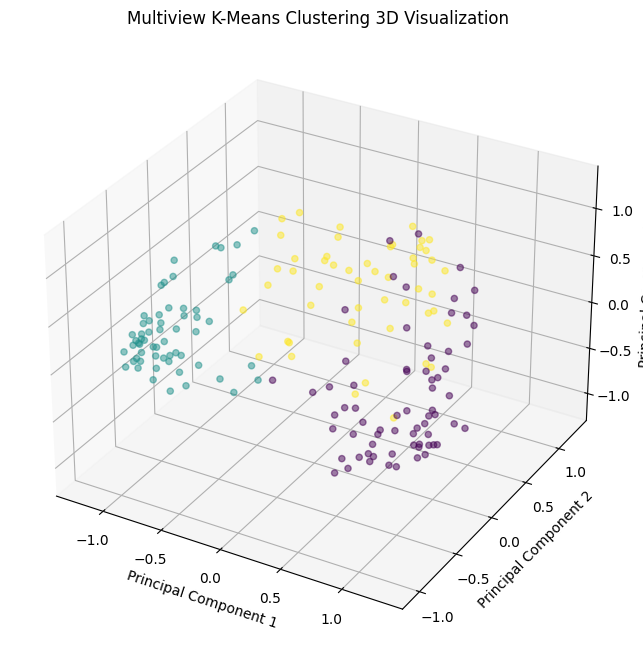

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming m_clusters is the result of Multiview K-Means clustering
# Assuming Xs is a list of views (Xs[0] and Xs[1] in this case)

# Concatenate the multiple views into a single array for PCA
X_multiview = np.hstack(Xs)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)  # Use 3 principal components for 3D visualization
X_multiview_pca = pca.fit_transform(X_multiview)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming m_clusters is the result of Multiview K-Means clustering
cluster_labels_multiview = np.hstack(m_clusters)

# Scatter plot with cluster labels from Multiview K-Means
ax.scatter(X_multiview_pca[:, 0], X_multiview_pca[:, 1], X_multiview_pca[:, 2],
           c=cluster_labels_multiview, cmap='viridis', alpha=0.5)

ax.set_title('Multiview K-Means Clustering 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [9]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

# Assuming you have X_multiview_pca and cluster_labels_multiview defined
# X_multiview_pca is the result of PCA applied to the concatenated multiview data

# Create a 3D scatter plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X_multiview_pca[:, 0],
    y=X_multiview_pca[:, 1],
    z=X_multiview_pca[:, 2],
    mode='markers',
    marker=dict(color=cluster_labels_multiview, colorscale='viridis', opacity=0.5),
    text='Cluster Labels'
))

fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'),
                  title='Multiview K-Means Clustering 3D Visualization',
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()
